In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [80]:
base_path = '/Users/danieldubovski/projects/deep_query_optimization/dqo/runtimes/'

In [81]:
sorted(os.listdir(base_path))

['dqo-m.cocra5h3f2sc.us-east-1.rds.amazonaws.com_imdb_1593866765.csv',
 'dqo-m.cocra5h3f2sc.us-east-1.rds.amazonaws.com_imdb_1593879096.csv',
 'dqo-m.cocra5h3f2sc.us-east-1.rds.amazonaws.com_imdb_1593884371.csv',
 'dqo-m.cocra5h3f2sc.us-east-1.rds.amazonaws.com_imdb_1594014835.csv',
 'localhost_imdb_1593788648.csv']

In [82]:
dfs = [pd.read_csv(base_path+f,names=['query', 'runtime']) for f in os.listdir(base_path) if f.startswith('dqo-m')]

In [83]:
for df in dfs:
    print(df.describe())

       query runtime
count      0       0
unique     0       0
top      NaN     NaN
freq     NaN     NaN
           runtime
count   190.000000
mean     30.204641
std     128.866282
min       0.148406
25%       0.258484
50%       1.360130
75%       9.362045
max    1169.769179
          runtime
count  296.000000
mean    10.574875
std     32.258350
min      0.149302
25%      0.217545
50%      0.525990
75%      4.614027
max    307.306035
          runtime
count  511.000000
mean     7.966495
std     29.051137
min      0.164324
25%      0.195229
50%      0.532255
75%      2.417576
max    446.011068


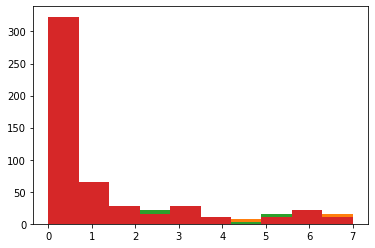

In [84]:
for df in dfs:
    plt.hist(df['runtime'].apply(np.log2).apply(lambda x: min(x, 7)).apply(lambda x: max(x, 0)))

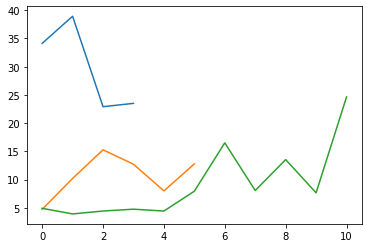

In [100]:
for df in dfs:
    if len(df) > 1:
        plt.plot(df['runtime'].groupby(by=df.index // 50).mean())